In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
from xml.etree import ElementTree as ET


In [2]:
root = ET.parse('2007_000032.xml').getroot()
print(root.findall('./object/'))


[<Element 'name' at 0x7fc2dce1cae8>, <Element 'pose' at 0x7fc2dce1cb38>, <Element 'truncated' at 0x7fc2dce1cb88>, <Element 'difficult' at 0x7fc2dce1cbd8>, <Element 'bndbox' at 0x7fc2dce1cc28>, <Element 'name' at 0x7fc2dce1ce08>, <Element 'pose' at 0x7fc2dce1ce58>, <Element 'truncated' at 0x7fc2dce1cea8>, <Element 'difficult' at 0x7fc2dce1cef8>, <Element 'bndbox' at 0x7fc2dce1cf48>, <Element 'name' at 0x7fc2dce23188>, <Element 'pose' at 0x7fc2dce231d8>, <Element 'truncated' at 0x7fc2dce23228>, <Element 'difficult' at 0x7fc2dce23278>, <Element 'bndbox' at 0x7fc2dce232c8>, <Element 'name' at 0x7fc2dce234a8>, <Element 'pose' at 0x7fc2dce234f8>, <Element 'truncated' at 0x7fc2dce23548>, <Element 'difficult' at 0x7fc2dce23598>, <Element 'bndbox' at 0x7fc2dce235e8>]


In [3]:
# print(ET.tostring(root, encoding='utf8').decode('utf8'))

In [4]:
for elements in root.findall('./object'):
    name = elements.find('name').text


In [5]:
name

'person'

In [6]:
VOC_CLASSES = (  # always index 0
    'aeroplane', 'bicycle', 'bird', 'boat',
    'bottle', 'bus', 'car', 'cat', 'chair',
    'cow', 'diningtable', 'dog', 'horse',
    'motorbike', 'person', 'pottedplant',
    'sheep', 'sofa', 'train', 'tvmonitor')

In [7]:
name = [f.text for f in root.findall('./object/name')]
print(name)

['aeroplane', 'aeroplane', 'person', 'person']


In [14]:
class VOCannotations(object):
    
    def __init__(self, file_name):
        self.root = ET.parse(file_name).getroot()
    
    def get_bndboxes(self):
        data = []
        for elements in self.root.findall('./object/bndbox'):
            xmin = int(float(elements.find('xmin').text))
            ymin = int(float(elements.find('ymin').text))
            xmax = int(float(elements.find('xmax').text))
            ymax = int(float(elements.find('ymax').text))
            data.append([xmin, ymin, xmax, ymax])
        return data
        
    def get_object_class(self):
        objects = []
        for elements in self.root.findall('./object'):
            objects.append(elements.find('name').text)
            
        return objects
    
    def get_dimensions(self):
        dim = [int(f.text) for f in self.root.findall('./size/')]
        return {'width':dim[1], 'height':dim[0], 'depth':dim[2]}
          
    def get_filename(self):
        return self.root.findall('./filename')[0].text
    
    def write_csvfile(self, save_path = None):
        filename = self.get_filename().split('.')[0]
        boxes    = self.get_bndboxes()
        classes  = self.get_object_class()
        
        data = []
        for i, box in enumerate(boxes):
            tmp  = [classes[i]]
            tmp.extend(box)
            data.append(tmp)

        header = ['class','xmin','ymin','xmax','ymax']
            
        save_path  = Path(save_path)
        
        if not Path.exists(save_path):
            save_path.mkdir(parents = True, exist_ok=True)
        
        
        df = pd.DataFrame(data)
        df.to_csv( save_path/'{}.csv'.format(filename), header = header, index = None)
        

In [9]:
test      = VOCannotations('2007_000032.xml')
boxes     = test.get_bndboxes()
filename  = test.get_filename()
dimension = test.get_dimensions()
classes   = test.get_object_class()
test.write_csvfile(save_path = Path.cwd()/'test')

In [10]:
print(filename)
print(dimension)
print(classes)
print(np.array(boxes).shape)


2007_000032.jpg
{'width': 281, 'height': 500, 'depth': 3}
['aeroplane', 'aeroplane', 'person', 'person']
(4, 4)


In [12]:
#Testing 
import cv2
from skimage.io import imread
import matplotlib.pyplot as plt

4332


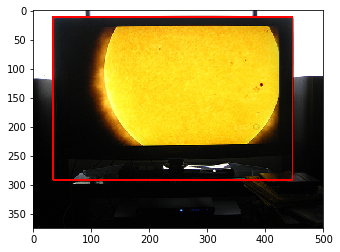

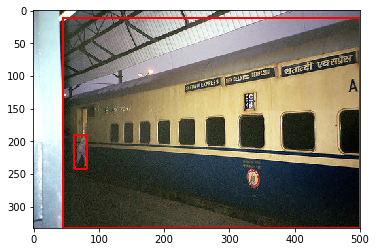

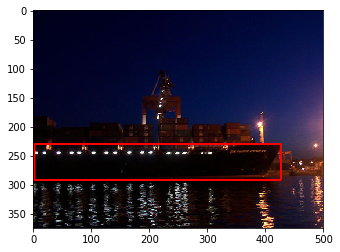

In [20]:
root = Path.home()/'Documents'/'data'/'VOCdevkit/VOC2008/'
trainval_file = root/'ImageSets'/'Main'/'trainval.txt'

with open(trainval_file) as f:
    files = f.read().split()
    print(len(files))
    for i, lines in enumerate(files):
        image_file, annotation_file = [Path(lines).with_suffix(f) for f in ['.jpg', '.xml']]
        image_path                  = root/'JPEGImages'/image_file
        annotation_path             = root/'Annotations'/annotation_file
        
        data = VOCannotations(annotation_path)
        bndboxes = data.get_bndboxes()       
#         # Read the image
        image = imread(image_path)
        for boxes in bndboxes:
            xmin, ymin, xmax, ymax = boxes
            cv2.rectangle(image, (xmin,ymin), (xmax, ymax), (255,0,0), 2)
        
        plt.imshow(image)
        plt.show()
        
        if i == 2:
            break